In [1]:
from training import *
from crnn import NeuralNet
from activation import Activation
import matplotlib.pyplot as plt

In [2]:
simutation = Training()

best_scores, worst_scores, best_network = simutation.train_n_times_batch_parallel(5000, 250)


Training Completed in 6:43:41 (~4.84 per generation)                        00:00     
  _____   ____  _   _ ______ 
 |  __ \ / __ \| \ | |  ____|
 | |  | | |  | |  \| | |__   
 | |  | | |  | | . ` |  __|  
 | |__| | |__| | |\  | |____ 
 |_____/ \____/|_| \_|______|


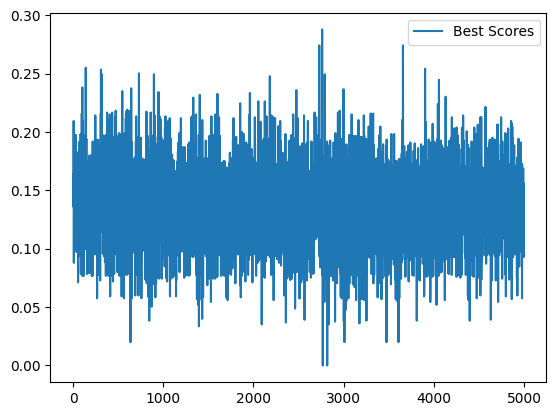

In [3]:
#plot the best and worst scores over time
plt.plot(best_scores, label="Best Scores")
plt.legend()
plt.show()

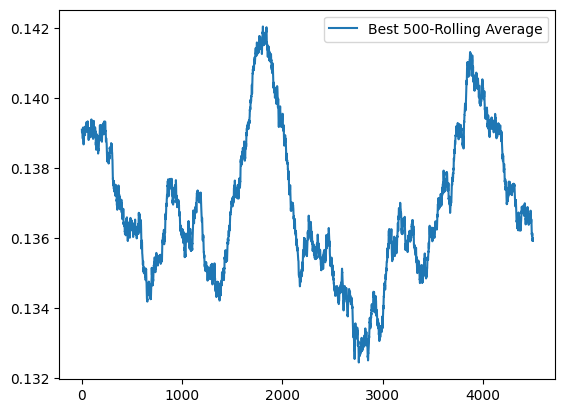

In [4]:
# plot the n generation rolling average of the best scores
n = 500
best_rolling_average = [np.mean(best_scores[i:i+n]) for i in range(len(best_scores)-n)]
worst_rolling_average = [np.mean(worst_scores[i:i+n]) for i in range(len(worst_scores)-n)]
plt.plot(best_rolling_average, label=f"Best {n}-Rolling Average")
# plt.plot(worst_rolling_average, label=f"Worst {n}-Rolling Average")
plt.legend()
plt.show()

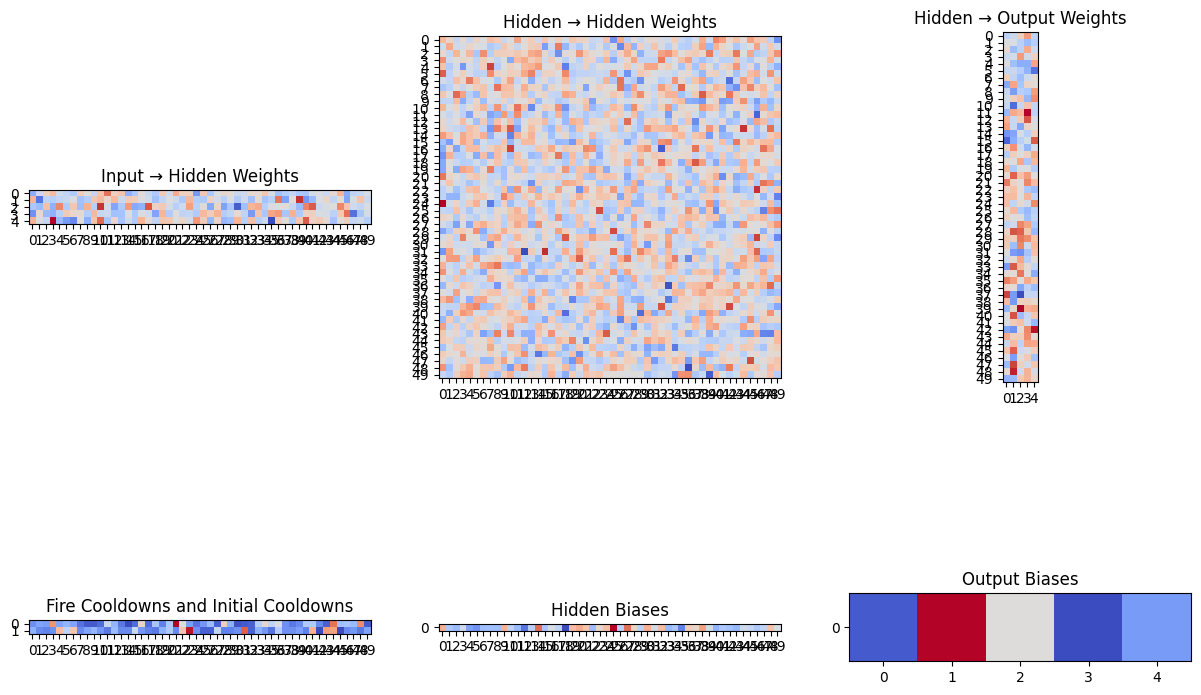

In [5]:
best_network.visualize_weights()

In [6]:
cooldowns = [neuron.fire_cooldown for neuron in best_network.hiddens]
# get unique cooldowns and their counts
unique_cooldowns, counts = np.unique(cooldowns, return_counts=True)
# convert to dictionary
cooldowns_dict = dict(zip(unique_cooldowns, counts))
cooldowns_dict

{0: 1,
 1: 1,
 2: 4,
 3: 3,
 4: 3,
 5: 2,
 6: 2,
 7: 1,
 8: 2,
 9: 2,
 10: 1,
 11: 2,
 12: 3,
 14: 1,
 15: 2,
 16: 2,
 17: 1,
 18: 2,
 19: 3,
 20: 1,
 22: 1,
 23: 1,
 26: 1,
 27: 1,
 30: 1,
 31: 1,
 32: 1,
 42: 1,
 43: 1,
 46: 1,
 55: 1}

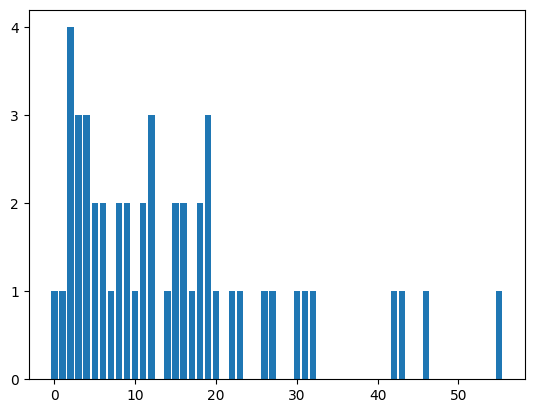

In [8]:
# plot the cooldowns
plt.bar(cooldowns_dict.keys(), cooldowns_dict.values())
# change the y-axis to increment by 1
plt.yticks(np.arange(0, max(cooldowns_dict.values())+1, 1))

plt.show()